# Generative Adversarial Network

## Preparation 


In [15]:
import torch 
import torchvision 
import torch.nn as nn 
from torchvision import datasets, transforms 
import torch.utils.data as tud 
import matplotlib.pyplot as plt 
import time


# import torch.nn.functional as F
# import torch.optim as optim 
# import numpy as np 


mnist_data = datasets.MNIST("./mnist_data",train=True,download=False,transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,),std=(0.5,))
]))
batch_size = 32 
dataloader = tud.DataLoader(mnist_data,batch_size = batch_size,shuffle=True)



## Network Configuration 

### Normal GAN

In [4]:
image_size = 28*28 
hidden_size = 256 
# Discriminator 
D = nn.Sequential(
    nn.Linear(image_size,hidden_size),
    nn.LeakyReLU(0.2,inplace = False),
#     nn.LeakyReLU(0.2),
    nn.Linear(hidden_size,hidden_size),
    nn.LeakyReLU(0.2,inplace = False),
#     nn.LeakyReLU(0,2),
    nn.Linear(hidden_size,1),
    nn.Sigmoid()
)

latent_size = 64
# Generator 
G = nn.Sequential(
    nn.Linear(latent_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,image_size),
    nn.Tanh())

# D = D.to(device)
# G = G.to(device)


loss_fn = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(),lr=0.0003)
g_optimizer = torch.optim.Adam(G.parameters(),lr=0.0003)

## Network training 

In [5]:
total_steps = len(dataloader)
num_epochs = 30 
for epoch in range(num_epochs):
    print("Epoch ",epoch+1," / ",num_epochs)
    start = time.time()
    for i,(images,_) in enumerate(dataloader):
        batch_size = images.shape[0]
        images = images.reshape(batch_size,image_size)
        real_labels = torch.ones(batch_size,1)
        fake_labels = torch.zeros(batch_size,1)
        outputs = D(images)
        d_loss_real = loss_fn (outputs,real_labels)
        real_score = outputs # The bigger the better for D
        # Fake image generating 
        z = torch.randn(batch_size,latent_size)
        fake_images = G(z)
        outputs = D(fake_images.detach())
        d_loss_fake = loss_fn(outputs,fake_labels)
        fake_score = outputs # The smaller the better for D 
        # Optimize discriminator 
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        # Optimize generator 
        outputs = D(fake_images)
        g_loss = loss_fn(outputs,real_labels)
        g_score = outputs 
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
    end = time.time()
    print("Time consumed: ", end - start)
    if (epoch % 10 == 0 ):
#         print("Real score: ", real_score," Fake score: ",fake_score," D loss: ",d_loss, " G loss: ",g_loss," G score: ",g_score)
        print("D loss: ",d_loss, " G loss: ",g_loss," G score: ",g_score)
        


Epoch  1  /  30
Real score:  tensor([[0.9832],
        [0.9407],
        [0.9979],
        [0.9702],
        [0.9595],
        [0.9923],
        [0.9895],
        [0.9930],
        [0.9903],
        [0.8300],
        [0.9078],
        [0.9985],
        [0.9881],
        [0.9499],
        [0.8523],
        [0.9966],
        [0.9999],
        [0.9519],
        [0.9986],
        [0.9776],
        [0.9963],
        [0.6312],
        [0.9690],
        [0.9864],
        [0.2353],
        [0.9969],
        [0.9854],
        [0.9444],
        [0.9898],
        [0.9955],
        [0.9519],
        [0.9985]], grad_fn=<SigmoidBackward>)  Fake score:  tensor([[0.0746],
        [0.0755],
        [0.1480],
        [0.1043],
        [0.1456],
        [0.1661],
        [0.0334],
        [0.0219],
        [0.0944],
        [0.0714],
        [0.1003],
        [0.1381],
        [0.1865],
        [0.1198],
        [0.0766],
        [0.0363],
        [0.0552],
        [0.1298],
        [0.2834],
        [0.

Real score:  tensor([[0.9973],
        [0.8987],
        [0.9527],
        [0.9872],
        [1.0000],
        [0.9924],
        [0.8647],
        [0.9905],
        [0.8068],
        [0.7673],
        [0.9998],
        [0.9995],
        [0.9997],
        [0.9824],
        [0.9888],
        [0.0465],
        [0.9999],
        [0.6967],
        [0.9931],
        [1.0000],
        [0.6811],
        [0.9997],
        [0.9808],
        [0.9902],
        [0.9618],
        [0.9997],
        [0.9976],
        [0.9465],
        [0.8936],
        [0.9887],
        [1.0000],
        [0.9962]], grad_fn=<SigmoidBackward>)  Fake score:  tensor([[0.0164],
        [0.0103],
        [0.5942],
        [0.0555],
        [0.6241],
        [0.0539],
        [0.2570],
        [0.0397],
        [0.1245],
        [0.2070],
        [0.7255],
        [0.1612],
        [0.1477],
        [0.0160],
        [0.1839],
        [0.5899],
        [0.4210],
        [0.7494],
        [0.7322],
        [0.1211],
        [

Epoch  12  /  30
Epoch  13  /  30
Epoch  14  /  30
Epoch  15  /  30
Epoch  16  /  30
Epoch  17  /  30
Epoch  18  /  30
Epoch  19  /  30
Epoch  20  /  30
Epoch  21  /  30
Epoch  22  /  30
Epoch  23  /  30
Epoch  24  /  30
Epoch  25  /  30
Epoch  26  /  30
Epoch  27  /  30
Epoch  28  /  30
Epoch  29  /  30
Epoch  30  /  30


## Model evaluation & Save

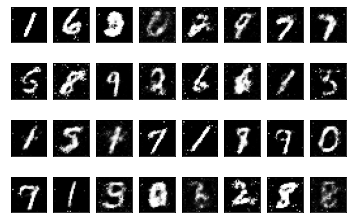

In [13]:
z = torch.randn(batch_size,latent_size)
fake_images = G(z)
fake_images = fake_images.view(batch_size,28,28).data.cpu().numpy()
# plt.imshow(fake_images[0],cmap=plt.cm.gray)
# plt.imshow(fake_images[1],cmap=plt.cm.gray)
plt.figure()
for i in range(1,33):
    plt.subplot(4,8,i)
#     plt.imshow(img_test[i-1])
    plt.imshow(fake_images[i-1],cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
plt.show()
    
torch.save(G.state_dict(),'mnist_generator.pth')
torch.save(D.state_dict(),'mnist_discriminator.pth')

### DC GAN: Deep Convolutional Generative Adversarial Networks

In [19]:
# # for generator 
# # number of filters for the first layer of generator 
# g_dim = 64 
# # color of dimension of output 
# c_dim = 1
# # size of output image 
# s = 28

# nc =1 
# nz  = 28*28

D = nn.Sequential (
    # dis
    nn.Conv2d(1,32,5,stride=1,padding=2),
    nn.LeakyReLU(0.2,True),
    nn.MaxPool2d((2,2)),

    nn.Conv2d(32,64,5,stride=1,padding=2),
    nn.LeakyReLU(0.2,True),
    nn.MaxPool2d((2,2)),
    # FC
    nn.Linear(7 * 7 * 64, 1024),
    nn.LeakyReLU(0.2, True),
    nn.Linear(1024, 1),
    nn.Sigmoid()

    )

G = nn.Sequential(
    # fc
    nn.Linear(100,3136),# 1*56*56
#     nn.Linear(input_size,num_feature),# 1*56*56
    # br 
    nn.BatchNorm2d(1),
    nn.ReLU(True),
    # gen
    nn.Conv2d(1,50,3,stride=1,padding=1),
    nn.BatchNorm2d(50),
    nn.ReLU(True),

    nn.Conv2d(50,25,3,stride=1,padding=1),
    nn.BatchNorm2d(25),
    nn.ReLU(True),

    nn.Conv2d(25,1,2,stride=2),
    nn.Tanh()    
    )

loss_fn = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(),lr=0.0003)
g_optimizer = torch.optim.Adam(G.parameters(),lr=0.0003)


total_steps = len(dataloader)
num_epochs = 30 
for epoch in range(num_epochs):
    print("Epoch ",epoch+1," / ",num_epochs)
    start = time.time()
    for i,(images,_) in enumerate(dataloader):
        batch_size = images.shape[0]
        images = images.reshape(1,32,5,5)# to modify
#         images = images.reshape(batch_size,image_size)# to modify
        real_labels = torch.ones(batch_size,1)
        fake_labels = torch.zeros(batch_size,1)
        outputs = D(images)
        d_loss_real = loss_fn (outputs,real_labels)
        real_score = outputs # The bigger the better for D
        # Fake image generating 
        z = torch.randn(batch_size,latent_size)
        fake_images = G(z)
        outputs = D(fake_images.detach())
        d_loss_fake = loss_fn(outputs,fake_labels)
        fake_score = outputs # The smaller the better for D 
        # Optimize discriminator 
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        # Optimize generator 
        outputs = D(fake_images)
        g_loss = loss_fn(outputs,real_labels)
        g_score = outputs 
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
    end = time.time()
    print("Time consumed: ", end - start)
    if (epoch % 10 == 0 ):
#         print("Real score: ", real_score," Fake score: ",fake_score," D loss: ",d_loss, " G loss: ",g_loss," G score: ",g_score)
        print("D loss: ",d_loss, " G loss: ",g_loss," G score: ",g_score)
        
z = torch.randn(batch_size,latent_size)
fake_images = G(z)
fake_images = fake_images.view(batch_size,28,28).data.cpu().numpy()
# plt.imshow(fake_images[0],cmap=plt.cm.gray)
# plt.imshow(fake_images[1],cmap=plt.cm.gray)
plt.figure()
for i in range(1,33):
    plt.subplot(4,8,i)
#     plt.imshow(img_test[i-1])
    plt.imshow(fake_images[i-1],cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
plt.show()
    
torch.save(G.state_dict(),'mnist_DCGAN_generator.pth')
torch.save(D.state_dict(),'mnist_DCGAN_discriminator.pth')

Epoch  1  /  30


RuntimeError: shape '[1, 32, 5, 5]' is invalid for input of size 25088